In [2]:
import pandas as pd

In [3]:
job_postings_path = r"C:\Users\vidya\Topic Modelling_3020\Thematic_skillsNer.csv" 
course_outlines_path = r"C:\Users\vidya\Topic Modelling_3020\Thematic_course_outlines.csv"

job_df = pd.read_csv(job_postings_path)
course_df = pd.read_csv(course_outlines_path)

In [4]:
if "Thematic" not in job_df.columns or "Thematic" not in course_df.columns:
    raise ValueError("One of the datasets is missing the 'Thematic' column.")

# Count occurrences of job descriptions per thematic area
job_counts = job_df["Thematic"].value_counts().reset_index()
job_counts.columns = ["Thematic Area", "Number of Job Descriptions"]

# Count occurrences of course outlines per thematic area
course_counts = course_df["Thematic"].value_counts().reset_index()
course_counts.columns = ["Thematic Area", "Number of Courses"]

# Merge both counts into a summary table
summary_table = pd.merge(job_counts, course_counts, on="Thematic Area", how="outer").fillna(0)


In [5]:
# Display table
print(summary_table)

    Thematic Area  Number of Job Descriptions  Number of Courses
0  communications                         100                 10
1        computer                         132                 10
2        controls                          69                 10
3     electronics                          56                  9
4           power                          84                  8


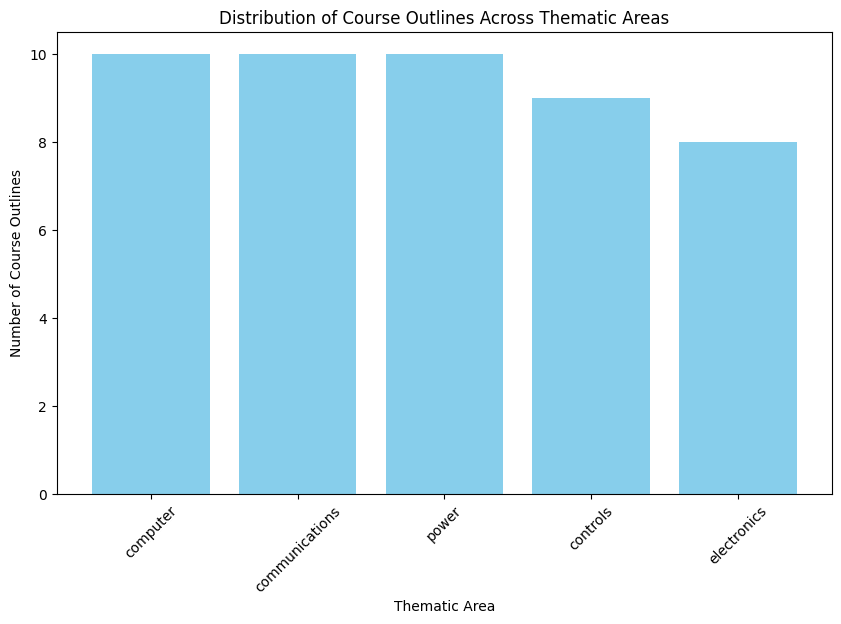

In [6]:
# Generate bar chart
plt.figure(figsize=(10, 6))
plt.bar(job_counts["Thematic Area"], course_counts["Number of Courses"], color='skyblue')
plt.xlabel("Thematic Area")
plt.ylabel("Number of Course Outlines")
plt.title("Distribution of Course Outlines Across Thematic Areas")
plt.xticks(rotation=45)
plt.savefig("course_outlines_distribution_bar.png")
plt.show()

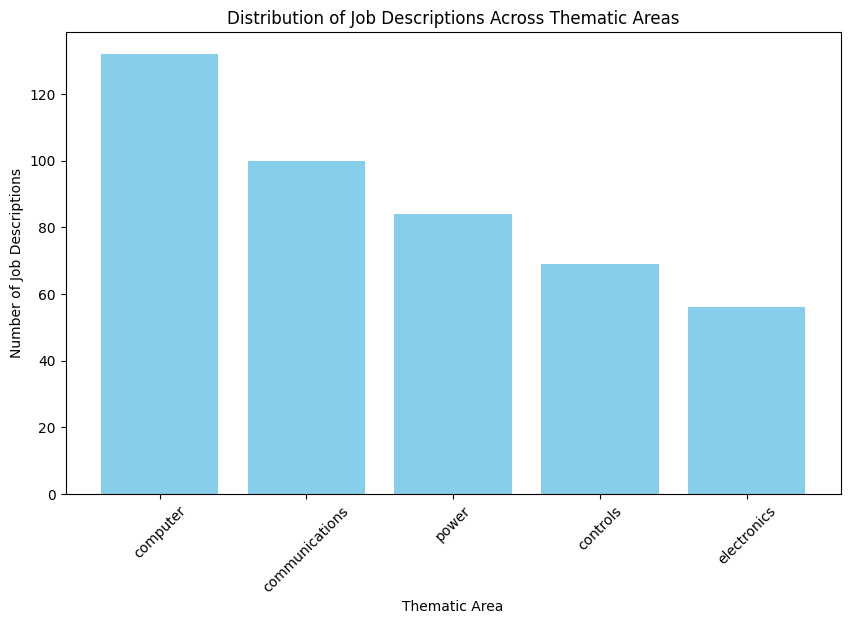

In [7]:
# Generate bar chart
plt.figure(figsize=(10, 6))
plt.bar(job_counts["Thematic Area"], job_counts["Number of Job Descriptions"], color='skyblue')
plt.xlabel("Thematic Area")
plt.ylabel("Number of Job Descriptions")
plt.title("Distribution of Job Descriptions Across Thematic Areas")
plt.xticks(rotation=45)
plt.savefig("ECE_Jobs_distribution_bar.png")
plt.show()

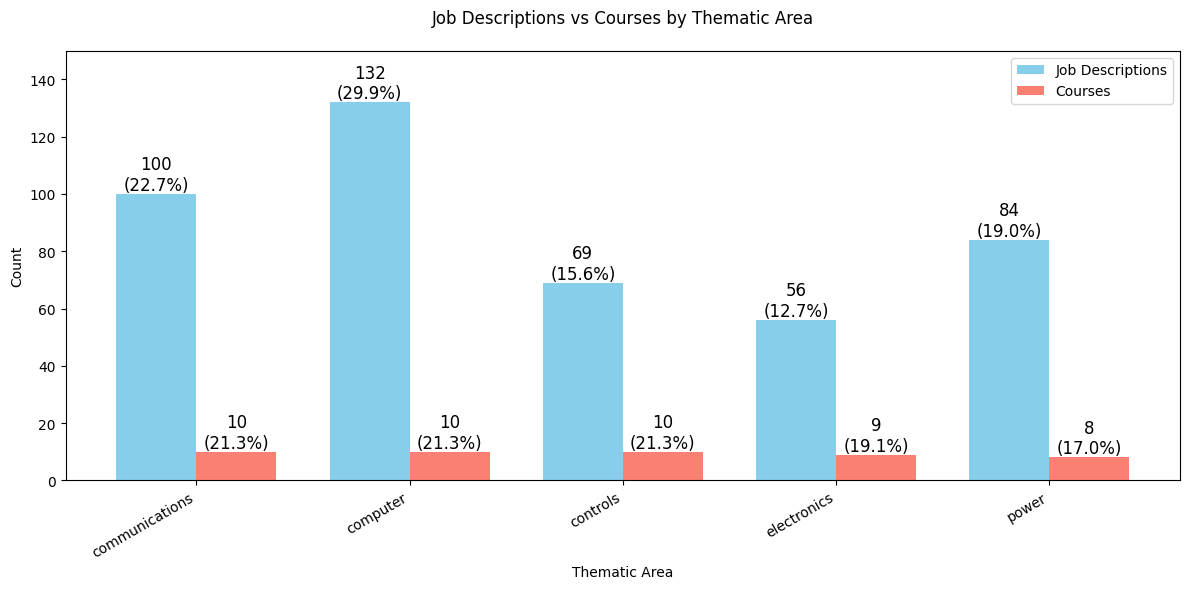

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# First, ensure we have the data
if "Thematic" not in job_df.columns or "Thematic" not in course_df.columns:
    raise ValueError("One of the datasets is missing the 'Thematic' column.")

# Count occurrences
job_counts = job_df["Thematic"].value_counts().reset_index()
job_counts.columns = ["Thematic Area", "Number of Job Descriptions"]

course_counts = course_df["Thematic"].value_counts().reset_index()
course_counts.columns = ["Thematic Area", "Number of Courses"]

# Merge data
summary_table = pd.merge(job_counts, course_counts, on="Thematic Area", how="outer").fillna(0)

# Convert counts to integers
summary_table['Number of Job Descriptions'] = summary_table['Number of Job Descriptions'].astype(int)
summary_table['Number of Courses'] = summary_table['Number of Courses'].astype(int)

# Calculate percentages
total_jobs = summary_table['Number of Job Descriptions'].sum()
total_courses = summary_table['Number of Courses'].sum()
summary_table['Job %'] = (summary_table['Number of Job Descriptions'] / total_jobs) * 100
summary_table['Course %'] = (summary_table['Number of Courses'] / total_courses) * 100

# Sort by thematic area for better presentation
summary_table = summary_table.sort_values('Thematic Area')

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.30  # Width of each bar
group_width = bar_width * 2  # Total width for each group (job + course)
group_spacing = 0.2  # Reduced spacing between groups

x = np.arange(len(summary_table)) * (group_width + group_spacing)  # Adjusted x positions
# Create bars
bars1 = plt.bar(x - bar_width/2, 
                summary_table['Number of Job Descriptions'], 
                width=bar_width, 
                color='skyblue', 
                label='Job Descriptions')

bars2 = plt.bar(x + bar_width/2, 
                summary_table['Number of Courses'], 
                width=bar_width, 
                color='salmon', 
                label='Courses')

# Add counts and percentages on top of each bar
for i, (rect1, rect2) in enumerate(zip(bars1, bars2)):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    
    if height1 > 0:
        plt.text(rect1.get_x() + rect1.get_width()/2., height1,
                f"{height1}\n({summary_table.iloc[i]['Job %']:.1f}%)",
                ha='center', va='bottom',
                color='black', fontsize=12)
    
    if height2 > 0:
        plt.text(rect2.get_x() + rect2.get_width()/2., height2,
                f"{height2}\n({summary_table.iloc[i]['Course %']:.1f}%)",
                ha='center', va='bottom',
                color='black', fontsize=12)

# Formatting
plt.title('Job Descriptions vs Courses by Thematic Area', pad=20)
plt.xlabel('Thematic Area')
plt.ylabel('Count')
plt.xticks(x, summary_table['Thematic Area'], rotation=30, ha='right')
plt.ylim(0, 150)  
plt.legend()
plt.tight_layout()

plt.show()